# Comparison of models for Like & Dislike (Inversion and No inversion) frames

## Import components

In [1]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os



/Users/pradyumna/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [46]:
def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [Like - Dislike] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    #fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)
        #if data1[i]<data2[i]:
            #print ("Participants with slope in Like < Dislike: " + str(i))
            
    
    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=18)
    plt.ylabel(title, fontsize=18)
    sns.despine()

# No inversion condition in Dislike
--------------------------------------------------------------------


# Load parameters for both conditions

In [3]:
# Load params from DISLIKE hierarchical model (using inverted input [3-value])
Dislike_sufix = '_Dislike_NoBin_Dislike_NUTS_31'
glam_full_dislike_estimates = np.load(str('results/estimates/glam_FF2018_full_hierarchical_cv'+Dislike_sufix+'.npy'))   

# Load params from LIKE hierarchical model
Like_sufix = '_Like_NoBin_NUTS_31'
glam_full_like_estimates = np.load(str('results/estimates/glam_FF2018_full_hierarchical_cv'+Like_sufix+'.npy'))   

## Parameters Like

In [4]:
params_part_like = pd.DataFrame.from_dict(glam_full_like_estimates.item(0))
params_part_like

,SNR,SNR_mu,SNR_sd,b,gamma,gamma_mu,gamma_sd,p_error,s,t0,tau,tau_mu,tau_sd,v,v_mu,v_sd
0,151.23,164.29,35.54,1.0,-0.11,-0.26,0.38,0.05,0.007843,0.0,3.74,3.34,1.14,0.000047,0.000052,0.000013
1,137.71,164.29,35.54,1.0,0.29,-0.26,0.38,0.05,0.010344,0.0,4.30,3.34,1.14,0.000072,0.000052,0.000013
2,141.48,164.29,35.54,1.0,-0.00,-0.26,0.38,0.05,0.008574,0.0,2.59,3.34,1.14,0.000058,0.000052,0.000013
3,157.60,164.29,35.54,1.0,-0.10,-0.26,0.38,0.05,0.007178,0.0,4.65,3.34,1.14,0.000043,0.000052,0.000013
4,96.58,164.29,35.54,1.0,-0.37,-0.26,0.38,0.05,0.007063,0.0,4.22,3.34,1.14,0.000080,0.000052,0.000013
5,113.65,164.29,35.54,1.0,0.15,-0.26,0.38,0.05,0.008615,0.0,2.80,3.34,1.14,0.000059,0.000052,0.000013
6,163.65,164.29,35.54,1.0,-0.00,-0.26,0.38,0.05,0.010656,0.0,3.55,3.34,1.14,0.000069,0.000052,0.000013
7,150.49,164.29,35.54,1.0,-0.08,-0.26,0.38,0.05,0.007405,0.0,3.29,3.34,1.14,0.000045,0.000052,0.000013
8,175.26,164.29,35.54,1.0,-0.71,-0.26,0.38,0.05,0.009622,0.0,1.24,3.34,1.14,0.000053,0.000052,0.000013
9,137.66,164.29,35.54,1.0,-0.08,-0.26,0.38,0.05,0.007104,0.0,4.77,3.34,1.14,0.000048,0.000052,0.000013


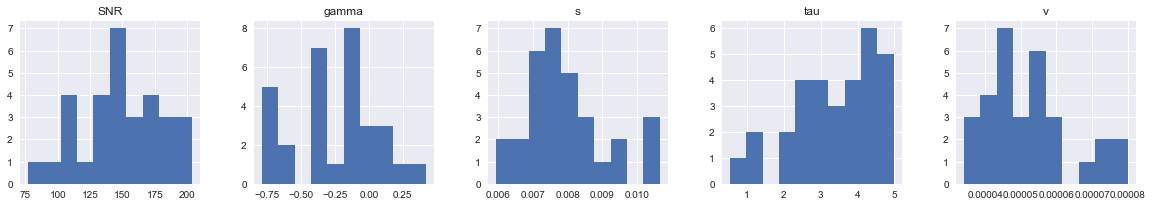

In [5]:
hist = params_part_like[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

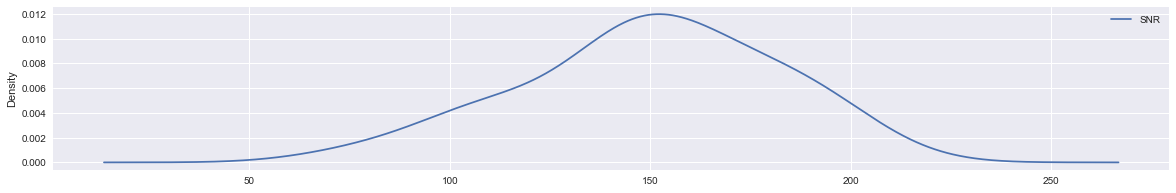

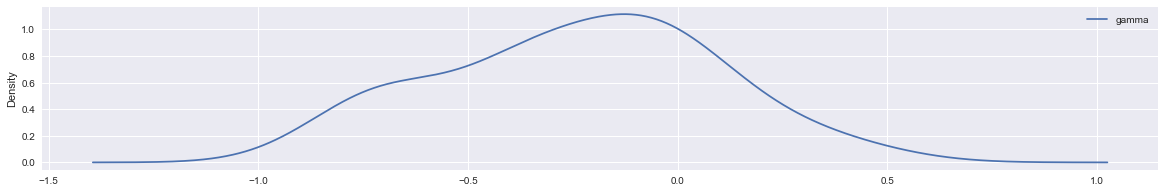

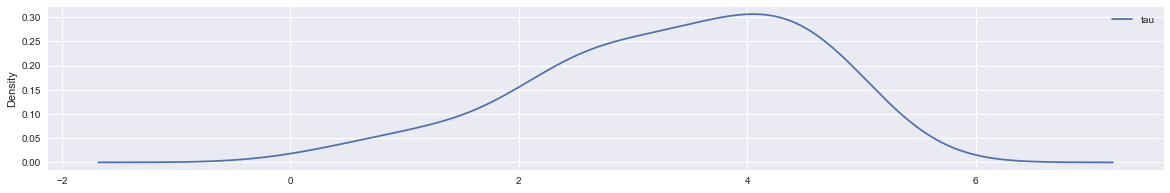

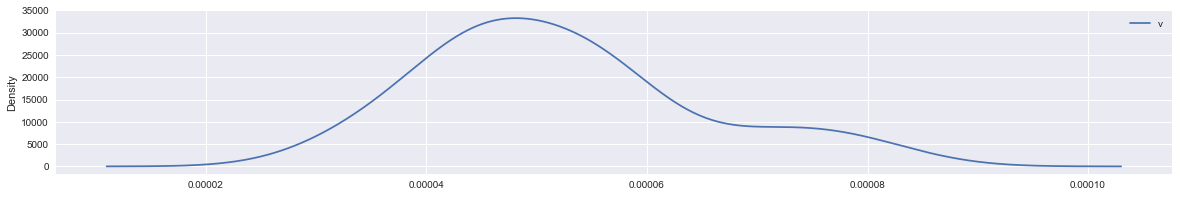

In [6]:
#plt.subplot(411)        
params_part_like[['SNR']].plot.kde(figsize = [20,3])
#plt.subplot(412)        
params_part_like[['gamma']].plot.kde(figsize = [20,3])
#plt.subplot(413)        
params_part_like[['tau']].plot.kde(figsize = [20,3])
#plt.subplot(414)        
params_part_like[['v']].plot.kde(figsize = [20,3])

## Parameters Dislike

In [7]:
params_part_dislike = pd.DataFrame.from_dict(glam_full_dislike_estimates.item(0))
params_part_dislike

,SNR,SNR_mu,SNR_sd,b,gamma,gamma_mu,gamma_sd,p_error,s,t0,tau,tau_mu,tau_sd,v,v_mu,v_sd
0,181.71,168.62,35.74,1.0,-0.99,-0.99,0.0,0.05,0.008239,0.0,1.06,2.15,1.11,0.000045,0.000054,0.00001
1,184.20,168.62,35.74,1.0,-0.99,-0.99,0.0,0.05,0.010435,0.0,2.29,2.15,1.11,0.000057,0.000054,0.00001
2,168.85,168.62,35.74,1.0,-0.99,-0.99,0.0,0.05,0.007971,0.0,0.07,2.15,1.11,0.000047,0.000054,0.00001
3,172.96,168.62,35.74,1.0,-0.99,-0.99,0.0,0.05,0.007857,0.0,2.15,2.15,1.11,0.000045,0.000054,0.00001
4,190.70,168.62,35.74,1.0,-0.99,-0.99,0.0,0.05,0.012280,0.0,1.76,2.15,1.11,0.000064,0.000054,0.00001
5,154.76,168.62,35.74,1.0,-0.99,-0.99,0.0,0.05,0.008996,0.0,0.88,2.15,1.11,0.000058,0.000054,0.00001
6,125.08,168.62,35.74,1.0,-0.99,-0.99,0.0,0.05,0.009025,0.0,2.16,2.15,1.11,0.000072,0.000054,0.00001
7,152.38,168.62,35.74,1.0,-0.99,-0.99,0.0,0.05,0.007546,0.0,4.16,2.15,1.11,0.000050,0.000054,0.00001
8,128.93,168.62,35.74,1.0,-0.99,-0.99,0.0,0.05,0.007637,0.0,1.87,2.15,1.11,0.000059,0.000054,0.00001
9,119.35,168.62,35.74,1.0,-0.99,-0.99,0.0,0.05,0.007601,0.0,4.36,2.15,1.11,0.000064,0.000054,0.00001


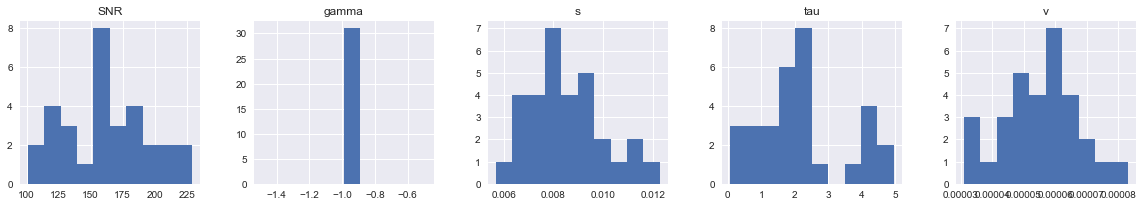

In [8]:
hist = params_part_dislike[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

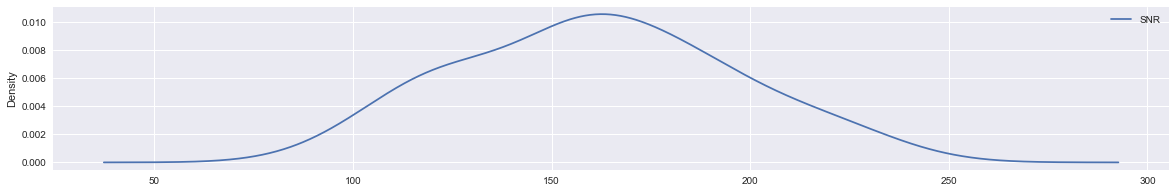

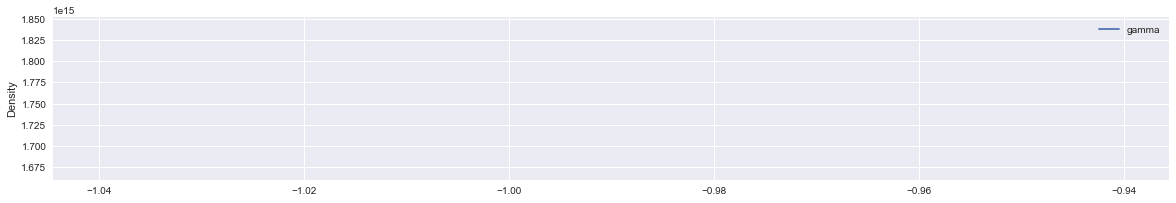

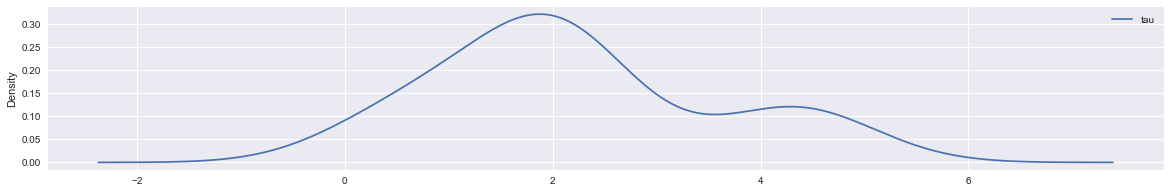

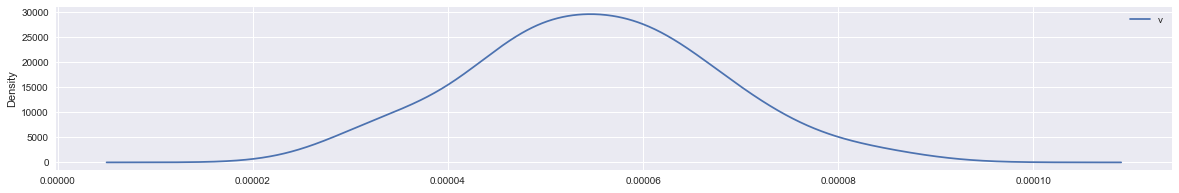

In [9]:
#plt.subplot(411)        
params_part_dislike[['SNR']].plot.kde(figsize = [20,3])
#plt.subplot(412)        
params_part_dislike[['gamma']].plot.kde(figsize = [20,3])
#plt.subplot(413)        
params_part_dislike[['tau']].plot.kde(figsize = [20,3])
#plt.subplot(414)        
params_part_dislike[['v']].plot.kde(figsize = [20,3])

In [10]:
# getting max, min and median values for our parameters from participants results
median_SNR_l = params_part_like[['SNR']].median().iloc[0]
median_gamma_l = params_part_like[['gamma']].median().iloc[0]
median_tau_l = params_part_like[['tau']].median().iloc[0]
median_v_l = params_part_like[['v']].median().iloc[0]
median_s_l = params_part_like[['s']].median().iloc[0]

medians_l = [ median_SNR_l , median_gamma_l, median_tau_l ,median_v_l ,median_s_l ]

max_SNR_l = params_part_like[['SNR']].max().iloc[0]
max_gamma_l = params_part_like[['gamma']].max().iloc[0]
max_tau_l = params_part_like[['tau']].max().iloc[0]
max_v_l = params_part_like[['v']].max().iloc[0]
max_s_l = params_part_like[['s']].max().iloc[0]

maxims_l = [ max_SNR_l , max_gamma_l, max_tau_l ,max_v_l ,max_s_l ]

min_SNR_l = params_part_like[['SNR']].min().iloc[0]
min_gamma_l = params_part_like[['gamma']].min().iloc[0]
min_tau_l = params_part_like[['tau']].min().iloc[0]
min_v_l = params_part_like[['v']].min().iloc[0]
min_s_l = params_part_like[['s']].min().iloc[0]

minis_l = [min_SNR_l , min_gamma_l, min_tau_l ,min_v_l ,min_s_l]

params_label = ['SNR','gamma','tau','v','s']

summary_l=[]
summary_l = np.column_stack((params_label, medians_l, maxims_l, minis_l))
summary_l = pd.DataFrame(summary_l, columns = ['params','med','maxims' ,'mins'])

In [11]:
## Merge dislike and like conditions in one dataframe

params_part_dislike['cond'] = 'Dislike'
params_part_like['cond'] = 'Like'
params_part_dislike['part'] = range(len(params_part_dislike))
params_part_like['part'] = range(len(params_part_dislike))
params_participants = [params_part_like , params_part_dislike]
params_participants = pd.concat(params_participants)

## We used repeated measures t-test to look for differences between both conditions.

In [12]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

SNR: [Like - Dislike] =  -11.41774193548386 ; p-value =0.15435416219041082
Gamma: [Like - Dislike] =  0.7496774193548381 ; p-value =6.483344367543453e-14
Tau: [Like - Dislike] =  1.1480645161290322 ; p-value =8.461596748045839e-05
V: [Like - Dislike] =  -2.6129032258064594e-06 ; p-value =0.22720163791281417
S: [Like - Dislike] =  -0.0006025806451612891 ; p-value =0.03691032329451867


## Violin plot for the comparison of the parameters

/Users/pradyumna/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


([<matplotlib.axis.XTick at 0x1c21447940>,
 <a list of 2 Text xticklabel objects>)

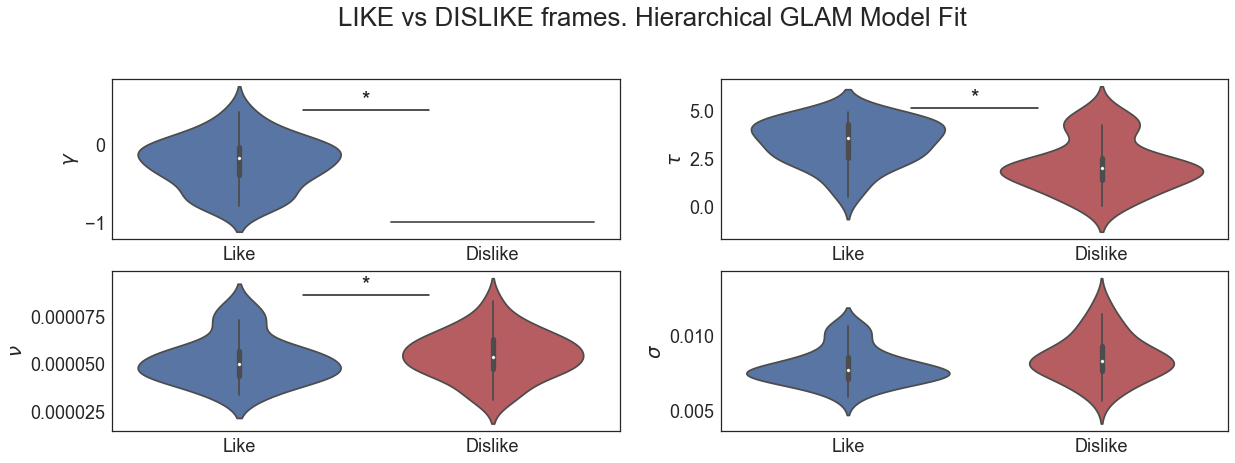

In [13]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)
plt.suptitle('LIKE vs DISLIKE frames. Hierarchical GLAM Model Fit')

#my_pal = {"r","b","b","y","r"}

my_pal = {0: "b", 1: "r"}

plt.subplot(321)

## ** Since SNR is dependent on gamma we plot gamma as the free parameter 

### FOR SNR
##all_arr = [params_part_like.SNR,
##          params_part_dislike.SNR]
##bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='SNR')
##plt.xticks([0, 1,], ['Like', 'Dislike'])

## Add asterisk
#x1, x2 = 0, 1   
#y_max = max([params_part_like.SNR.max(), params_part_dislike.SNR.max()])
#y, h, col = y_max + y_max/50, y_max/50, 'k'
#plt.plot( [x1+0.1, x2-0.1], [ y+h, y+h], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR gamma
#plt.subplot(321)
all_arr1 = [params_part_like.gamma,
            params_part_dislike.gamma]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\gamma$')
plt.xticks([0 ,1], ['Like', 'Dislike'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.gamma.max(), params_part_dislike.gamma.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR tau
plt.subplot(322)
all_arr1 = [params_part_like.tau,
            params_part_dislike.tau]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\tau$')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.tau.max(), params_part_dislike.tau.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR v
plt.subplot(323)
all_arr1 = [params_part_like.v,
            params_part_dislike.v]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\nu$')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.v.max(), params_part_dislike.v.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR s
plt.subplot(324)
all_arr1 = [params_part_like.s,
            params_part_dislike.s]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\sigma$')
plt.xticks([0, 1,], ['Like', 'Dislike'])


ChoiceSlopes: MeanL = -0.24; MeanD = -0.99; [Like - Dislike] =  0.75; t =  13.06 ; p-value =0.0
ChoiceSlopes: MeanL = 3.37; MeanD = 2.22; [Like - Dislike] =  1.15; t =  4.54 ; p-value =0.0
ChoiceSlopes: MeanL = 0.0; MeanD = 0.0; [Like - Dislike] =  -0.0; t =  -1.23 ; p-value =0.23
ChoiceSlopes: MeanL = 0.01; MeanD = 0.01; [Like - Dislike] =  -0.0; t =  -2.18 ; p-value =0.04


(0.004, 0.012)

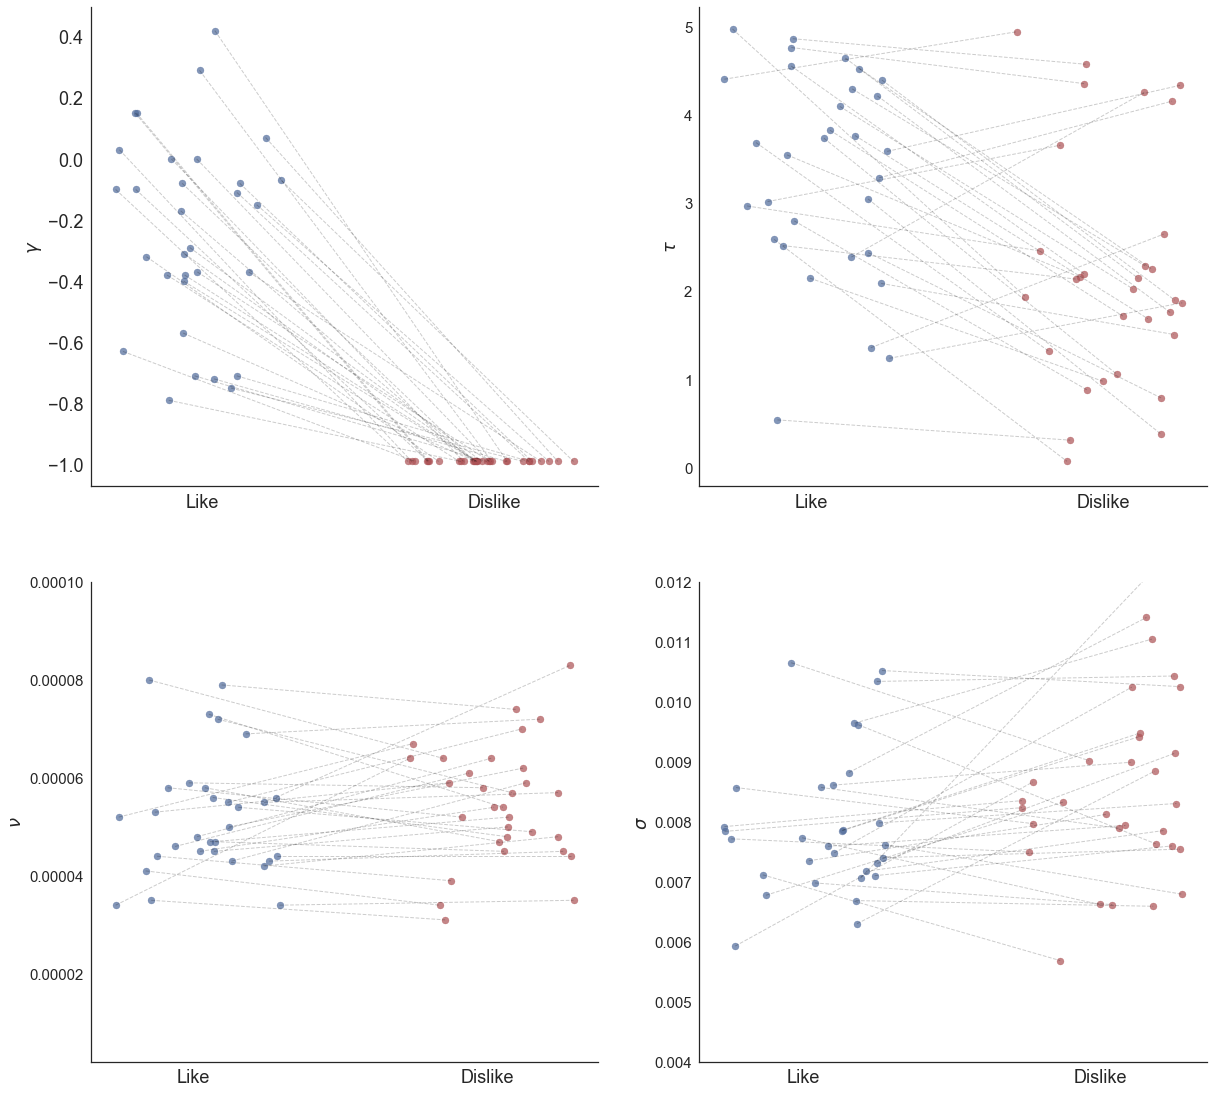

In [14]:
f = plt.figure(figsize=(20,30))
sns.set(style='white', font_scale=1.8)

plt.subplot(321)
ttestsPlot(params_part_like.gamma, params_part_dislike.gamma,'#4F6A9A','#AC5255',"Like",  "Dislike",title = '$\gamma$')
plt.subplot(322)
ttestsPlot(params_part_like.tau, params_part_dislike.tau,'#4F6A9A','#AC5255',"Like",  "Dislike",title = r'$\tau$')
plt.subplot(323)
ttestsPlot(params_part_like.v, params_part_dislike.v,'#4F6A9A','#AC5255',"Like",  "Dislike",title = r'$\nu$')
plt.ylim(0.000002, 0.0001)
plt.subplot(324)
ttestsPlot(params_part_like.s, params_part_dislike.s,'#4F6A9A','#AC5255',"Like",  "Dislike",title = '$\sigma$')
plt.ylim(0.004,0.012 )

## Plot independent points for each participant instead of a cloud

ValueError: min() arg is an empty sequence

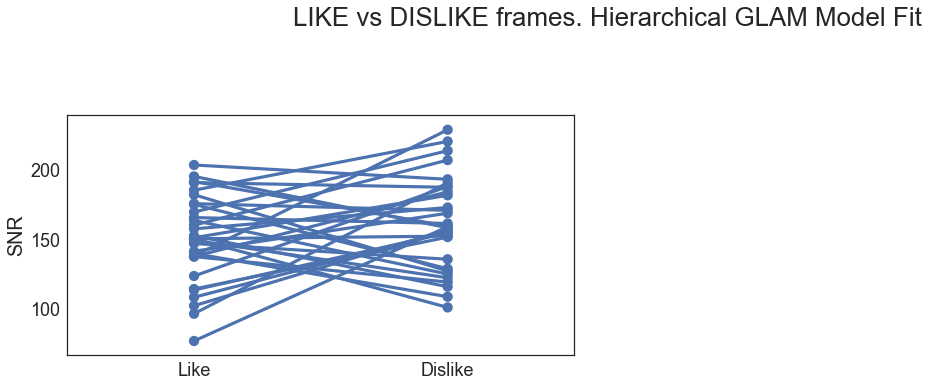

In [15]:
plt.figure(figsize=(20,15))
sns.set(style='white', font_scale=1.8)
plt.suptitle('LIKE vs DISLIKE frames. Hierarchical GLAM Model Fit')

#my_pal = {"r" ,"b"}

#ax1 = sns.pointplot(x="cond", y="v", palette = my_pal,  data=params_participants, hue = 'cond');



plt.subplot(321)
# FOR SNR
for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="SNR",  data=param_indiv);
    ax1.set(ylabel='SNR', xlabel='')



# FOR gamma
plt.subplot(322)
for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="gamma",  data=param_indiv);
    ax1.set(ylabel='gamma', xlabel='')

## FOR tau
plt.subplot(323)
for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="tau",  data=param_indiv);
    ax1.set(ylabel='tau', xlabel='', )

## FOR v
plt.subplot(324)

for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="v",  data=param_indiv);
    ax1.set(ylabel='v', xlabel='', )            
            

# FOR s
plt.subplot(325)
for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="s",  data=param_indiv);
    ax1.set(ylabel='s', xlabel='')


## **The significant differences are mantained independently of the repetition of the fit**

# Inversion condition in Dislike
--------------------------------------------------------

# Load parameters for both conditions

In [28]:
# Load params from DISLIKE hierarchical model (using inverted input [3-value])
Dislike_sufix = '_Dislike_NoBin_Dislike_NUTS_Inv_31'
glam_full_dislike_estimates = np.load(str('results/estimates/glam_FF2018_full_hierarchical_cv'+Dislike_sufix+'.npy'))   

# Load params from LIKE hierarchical model
Like_sufix = '_Like_NoBin_NUTS_31'
glam_full_like_estimates = np.load(str('results/estimates/glam_FF2018_full_hierarchical_cv'+Like_sufix+'.npy'))   

## Parameters Like

In [29]:
params_part_like = pd.DataFrame.from_dict(glam_full_like_estimates.item(0))
params_part_like

,SNR,SNR_mu,SNR_sd,b,gamma,gamma_mu,gamma_sd,p_error,s,t0,tau,tau_mu,tau_sd,v,v_mu,v_sd
0,151.23,164.29,35.54,1.0,-0.11,-0.26,0.38,0.05,0.007843,0.0,3.74,3.34,1.14,0.000047,0.000052,0.000013
1,137.71,164.29,35.54,1.0,0.29,-0.26,0.38,0.05,0.010344,0.0,4.30,3.34,1.14,0.000072,0.000052,0.000013
2,141.48,164.29,35.54,1.0,-0.00,-0.26,0.38,0.05,0.008574,0.0,2.59,3.34,1.14,0.000058,0.000052,0.000013
3,157.60,164.29,35.54,1.0,-0.10,-0.26,0.38,0.05,0.007178,0.0,4.65,3.34,1.14,0.000043,0.000052,0.000013
4,96.58,164.29,35.54,1.0,-0.37,-0.26,0.38,0.05,0.007063,0.0,4.22,3.34,1.14,0.000080,0.000052,0.000013
5,113.65,164.29,35.54,1.0,0.15,-0.26,0.38,0.05,0.008615,0.0,2.80,3.34,1.14,0.000059,0.000052,0.000013
6,163.65,164.29,35.54,1.0,-0.00,-0.26,0.38,0.05,0.010656,0.0,3.55,3.34,1.14,0.000069,0.000052,0.000013
7,150.49,164.29,35.54,1.0,-0.08,-0.26,0.38,0.05,0.007405,0.0,3.29,3.34,1.14,0.000045,0.000052,0.000013
8,175.26,164.29,35.54,1.0,-0.71,-0.26,0.38,0.05,0.009622,0.0,1.24,3.34,1.14,0.000053,0.000052,0.000013
9,137.66,164.29,35.54,1.0,-0.08,-0.26,0.38,0.05,0.007104,0.0,4.77,3.34,1.14,0.000048,0.000052,0.000013


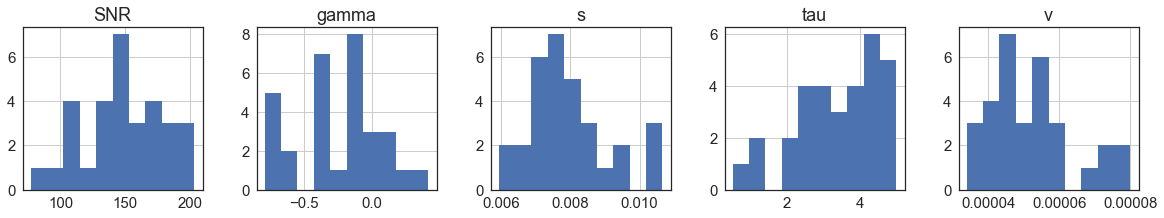

In [30]:
hist = params_part_like[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

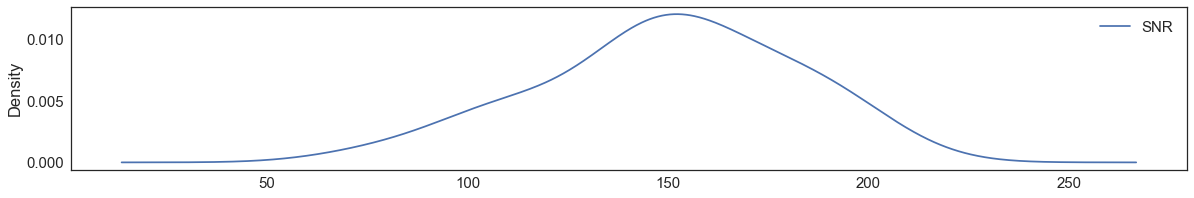

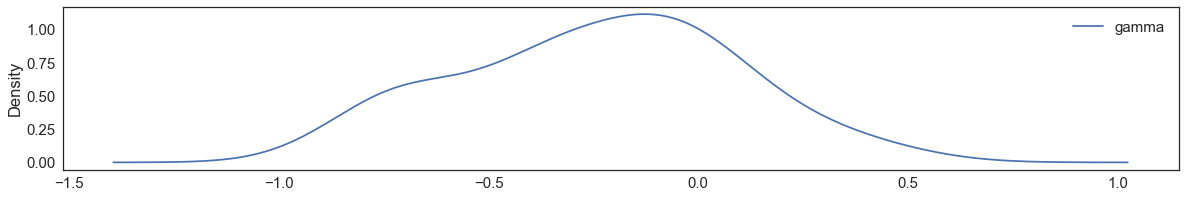

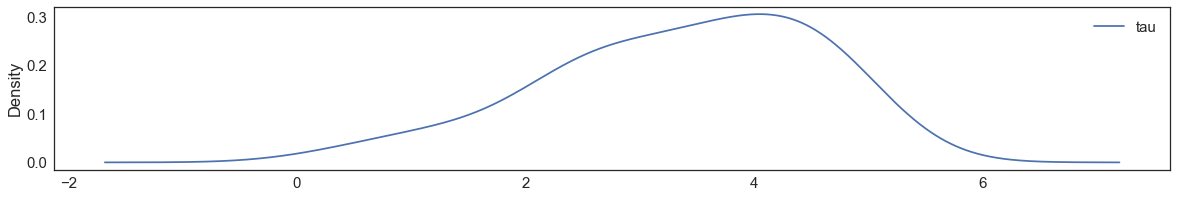

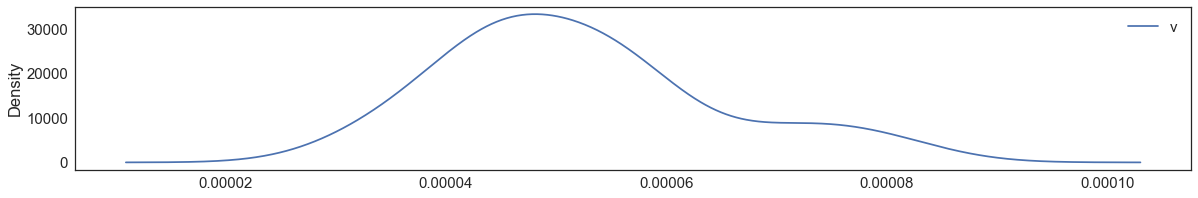

In [31]:
#plt.subplot(411)        
params_part_like[['SNR']].plot.kde(figsize = [20,3])
#plt.subplot(412)        
params_part_like[['gamma']].plot.kde(figsize = [20,3])
#plt.subplot(413)        
params_part_like[['tau']].plot.kde(figsize = [20,3])
#plt.subplot(414)        
params_part_like[['v']].plot.kde(figsize = [20,3])

## Parameters Dislike

In [32]:
params_part_dislike = pd.DataFrame.from_dict(glam_full_dislike_estimates.item(0))
params_part_dislike

,SNR,SNR_mu,SNR_sd,b,gamma,gamma_mu,gamma_sd,p_error,s,t0,tau,tau_mu,tau_sd,v,v_mu,v_sd
0,175.47,186.55,35.83,1.0,0.53,-0.09,0.48,0.05,0.005929,0.0,3.45,2.85,1.01,0.000039,0.000044,0.000011
1,200.96,186.55,35.83,1.0,0.73,-0.09,0.48,0.05,0.010297,0.0,2.18,2.85,1.01,0.000050,0.000044,0.000011
2,159.54,186.55,35.83,1.0,0.97,-0.09,0.48,0.05,0.007670,0.0,0.93,2.85,1.01,0.000042,0.000044,0.000011
3,178.00,186.55,35.83,1.0,-0.05,-0.09,0.48,0.05,0.007801,0.0,2.92,2.85,1.01,0.000037,0.000044,0.000011
4,186.73,186.55,35.83,1.0,0.18,-0.09,0.48,0.05,0.009849,0.0,4.10,2.85,1.01,0.000050,0.000044,0.000011
5,173.28,186.55,35.83,1.0,0.27,-0.09,0.48,0.05,0.008528,0.0,3.45,2.85,1.01,0.000047,0.000044,0.000011
6,145.49,186.55,35.83,1.0,0.21,-0.09,0.48,0.05,0.009641,0.0,1.81,2.85,1.01,0.000055,0.000044,0.000011
7,159.34,186.55,35.83,1.0,-0.09,-0.09,0.48,0.05,0.007573,0.0,3.79,2.85,1.01,0.000042,0.000044,0.000011
8,160.79,186.55,35.83,1.0,-0.67,-0.09,0.48,0.05,0.008367,0.0,3.15,2.85,1.01,0.000047,0.000044,0.000011
9,124.54,186.55,35.83,1.0,-0.67,-0.09,0.48,0.05,0.007714,0.0,4.68,2.85,1.01,0.000052,0.000044,0.000011


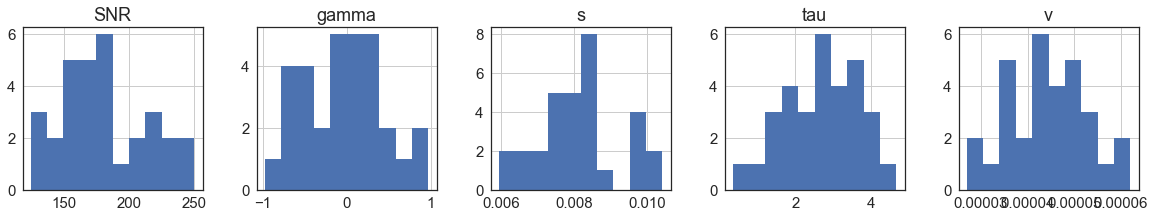

In [33]:
hist = params_part_dislike[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

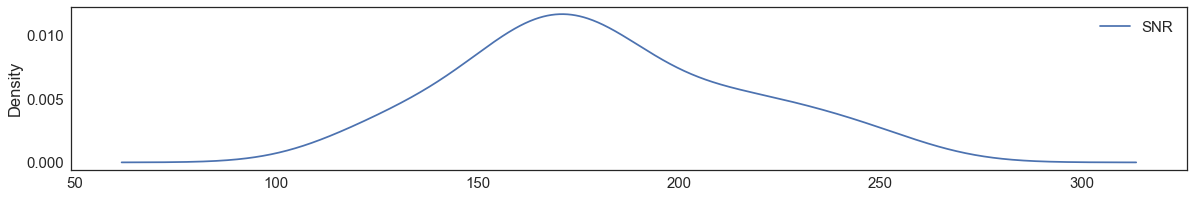

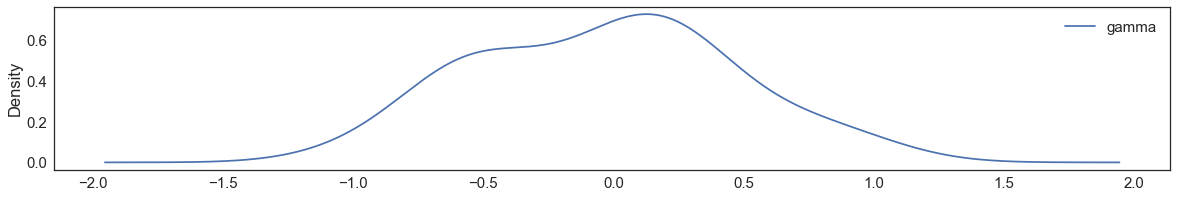

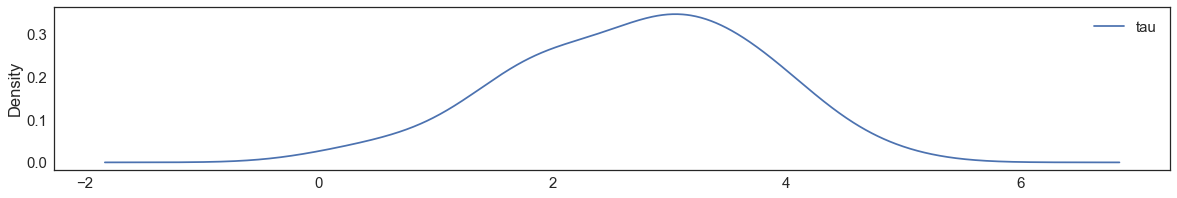

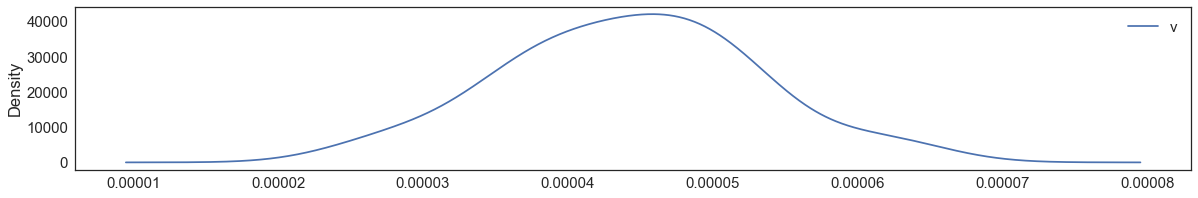

In [34]:
#plt.subplot(411)        
params_part_dislike[['SNR']].plot.kde(figsize = [20,3])
#plt.subplot(412)        
params_part_dislike[['gamma']].plot.kde(figsize = [20,3])
#plt.subplot(413)        
params_part_dislike[['tau']].plot.kde(figsize = [20,3])
#plt.subplot(414)        
params_part_dislike[['v']].plot.kde(figsize = [20,3])

In [35]:
# getting max, min and median values for our parameters from participants results
median_SNR_l = params_part_like[['SNR']].median().iloc[0]
median_gamma_l = params_part_like[['gamma']].median().iloc[0]
median_tau_l = params_part_like[['tau']].median().iloc[0]
median_v_l = params_part_like[['v']].median().iloc[0]
median_s_l = params_part_like[['s']].median().iloc[0]

medians_l = [ median_SNR_l , median_gamma_l, median_tau_l ,median_v_l ,median_s_l ]

max_SNR_l = params_part_like[['SNR']].max().iloc[0]
max_gamma_l = params_part_like[['gamma']].max().iloc[0]
max_tau_l = params_part_like[['tau']].max().iloc[0]
max_v_l = params_part_like[['v']].max().iloc[0]
max_s_l = params_part_like[['s']].max().iloc[0]

maxims_l = [ max_SNR_l , max_gamma_l, max_tau_l ,max_v_l ,max_s_l ]

min_SNR_l = params_part_like[['SNR']].min().iloc[0]
min_gamma_l = params_part_like[['gamma']].min().iloc[0]
min_tau_l = params_part_like[['tau']].min().iloc[0]
min_v_l = params_part_like[['v']].min().iloc[0]
min_s_l = params_part_like[['s']].min().iloc[0]

minis_l = [min_SNR_l , min_gamma_l, min_tau_l ,min_v_l ,min_s_l]

params_label = ['SNR','gamma','tau','v','s']

summary_l=[]
summary_l = np.column_stack((params_label, medians_l, maxims_l, minis_l))
summary_l = pd.DataFrame(summary_l, columns = ['params','med','maxims' ,'mins'])

In [36]:
## Merge dislike and like conditions in one dataframe

params_part_dislike['cond'] = 'Dislike'
params_part_like['cond'] = 'Like'
params_part_dislike['part'] = range(len(params_part_dislike))
params_part_like['part'] = range(len(params_part_dislike))
params_participants = [params_part_like , params_part_dislike]
params_participants = pd.concat(params_participants)

## We used repeated measures t-test to look for differences between both conditions.

In [37]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

SNR: [Like - Dislike] =  -30.80935483870971 ; p-value =0.00011692095667267588
Gamma: [Like - Dislike] =  -0.20419354838709677 ; p-value =0.01031793504253934
Tau: [Like - Dislike] =  0.6416129032258069 ; p-value =0.010870125504058284
V: [Like - Dislike] =  7.870967741935494e-06 ; p-value =2.7804250904112916e-05
S: [Like - Dislike] =  -0.00017661290322580452 ; p-value =0.4051614412227864


## Violin plot for the comparison of the parameters

/Users/pradyumna/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


([<matplotlib.axis.XTick at 0x1c238816a0>,
 <a list of 2 Text xticklabel objects>)

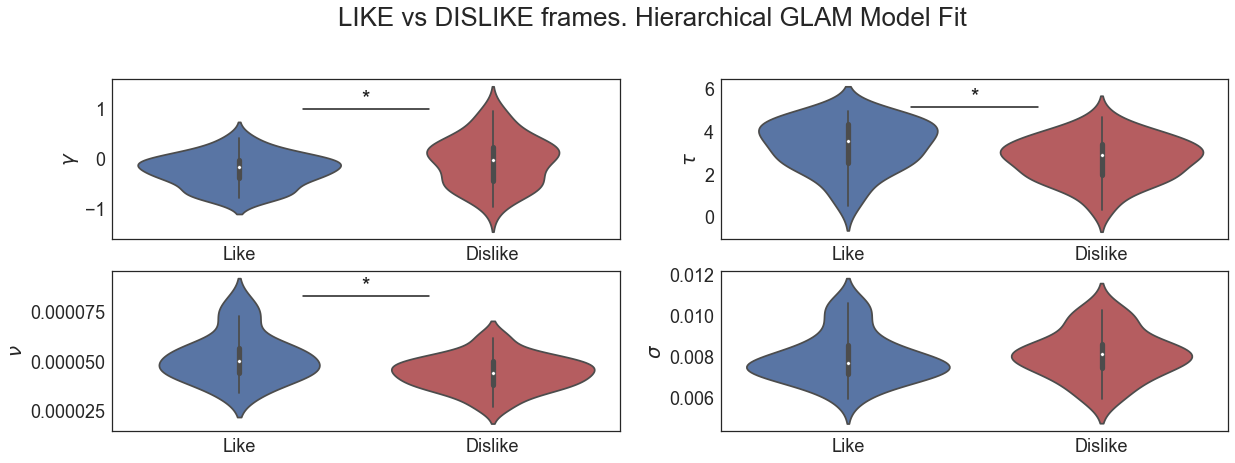

In [38]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)
plt.suptitle('LIKE vs DISLIKE frames. Hierarchical GLAM Model Fit')

#my_pal = {"r","b","b","y","r"}

my_pal = {0: "b", 1: "r"}

plt.subplot(321)

## ** Since SNR is dependent on gamma we plot gamma as the free parameter 

### FOR SNR
##all_arr = [params_part_like.SNR,
##          params_part_dislike.SNR]
##bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='SNR')
##plt.xticks([0, 1,], ['Like', 'Dislike'])

## Add asterisk
#x1, x2 = 0, 1   
#y_max = max([params_part_like.SNR.max(), params_part_dislike.SNR.max()])
#y, h, col = y_max + y_max/50, y_max/50, 'k'
#plt.plot( [x1+0.1, x2-0.1], [ y+h, y+h], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR gamma
#plt.subplot(321)
all_arr1 = [params_part_like.gamma,
            params_part_dislike.gamma]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\gamma$')
plt.xticks([0 ,1], ['Like', 'Dislike'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.gamma.max(), params_part_dislike.gamma.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR tau
plt.subplot(322)
all_arr1 = [params_part_like.tau,
            params_part_dislike.tau]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\tau$')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.tau.max(), params_part_dislike.tau.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR v
plt.subplot(323)
all_arr1 = [params_part_like.v,
            params_part_dislike.v]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\nu$')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.v.max(), params_part_dislike.v.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR s
plt.subplot(324)
all_arr1 = [params_part_like.s,
            params_part_dislike.s]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\sigma$')
plt.xticks([0, 1,], ['Like', 'Dislike'])


In [53]:
def add_star(list1,list2):
    x1, x2 = 1, 2   
    y_max = max([list1.max(),list2.max()])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)


MeanL = -0.24; MeanD = -0.04; [Like - Dislike] =  -0.2; t =  -2.74 ; p-value =0.01
MeanL = 3.37; MeanD = 2.73; [Like - Dislike] =  0.64; t =  2.72 ; p-value =0.01
MeanL = 0.0; MeanD = 0.0; [Like - Dislike] =  0.0; t =  4.94 ; p-value =0.0
MeanL = 0.01; MeanD = 0.01; [Like - Dislike] =  -0.0; t =  -0.84 ; p-value =0.41


(0.004, 0.012)

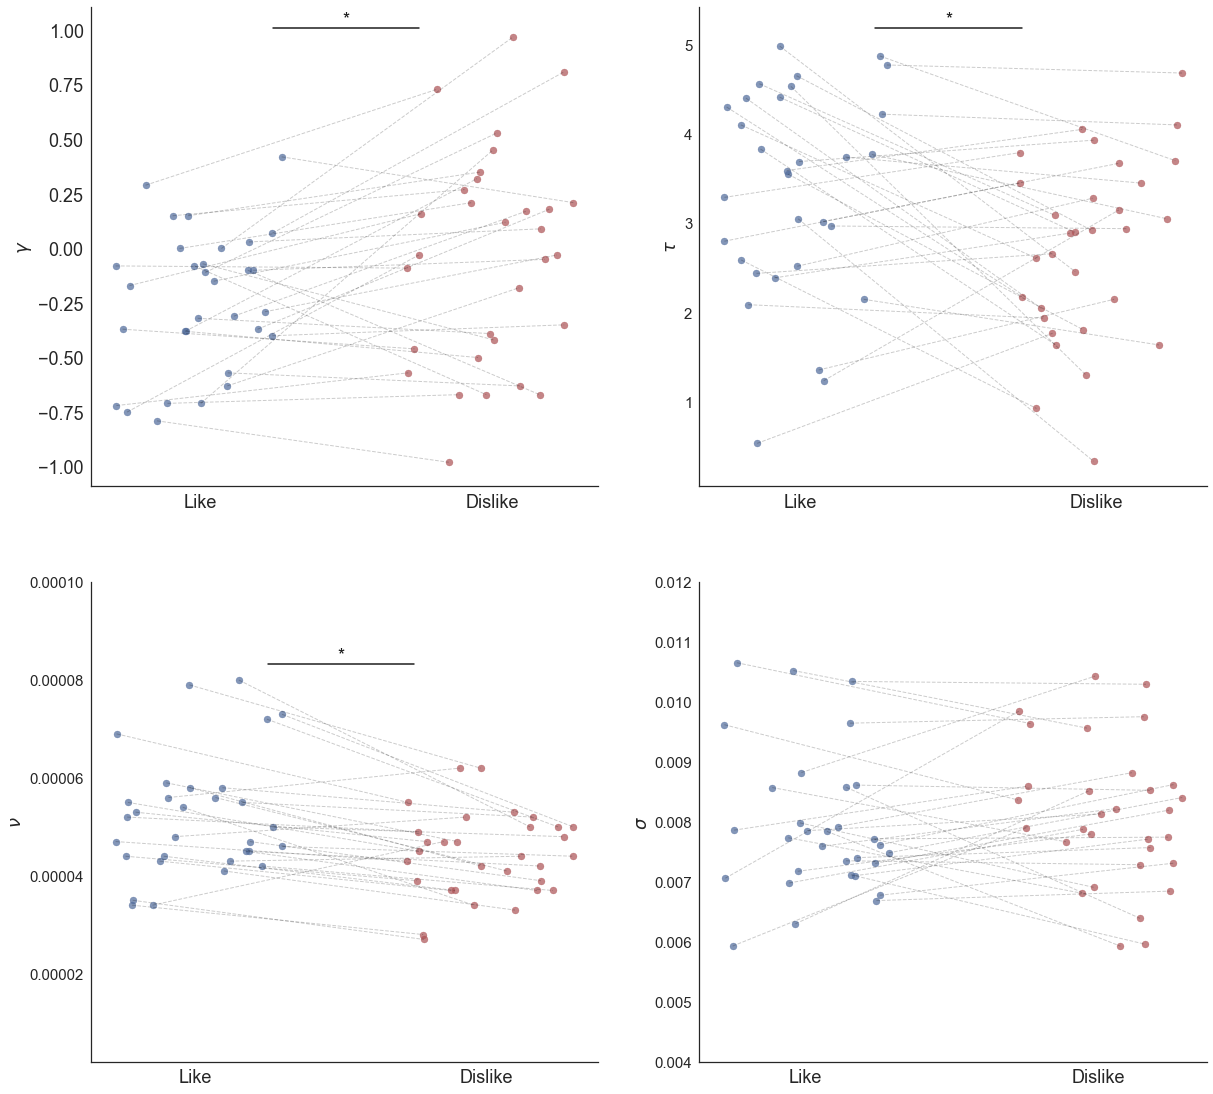

In [54]:
f = plt.figure(figsize=(20,30))
sns.set(style='white', font_scale=1.8)

plt.subplot(321)
ttestsPlot(params_part_like.gamma, params_part_dislike.gamma,'#4F6A9A','#AC5255',"Like",  "Dislike",title = '$\gamma$')
add_star(params_part_like.gamma,params_part_dislike.gamma)

plt.subplot(322)
ttestsPlot(params_part_like.tau, params_part_dislike.tau,'#4F6A9A','#AC5255',"Like",  "Dislike",title = r'$\tau$')
add_star(params_part_like.tau,params_part_dislike.tau)

plt.subplot(323)
ttestsPlot(params_part_like.v, params_part_dislike.v,'#4F6A9A','#AC5255',"Like",  "Dislike",title = r'$\nu$')
plt.ylim(0.000002, 0.0001)
add_star(params_part_like.v,params_part_dislike.v)

plt.subplot(324)
ttestsPlot(params_part_like.s, params_part_dislike.s,'#4F6A9A','#AC5255',"Like",  "Dislike",title = '$\sigma$')
plt.ylim(0.004,0.012 )

## Plot independent points for each participant instead of a cloud

ValueError: min() arg is an empty sequence

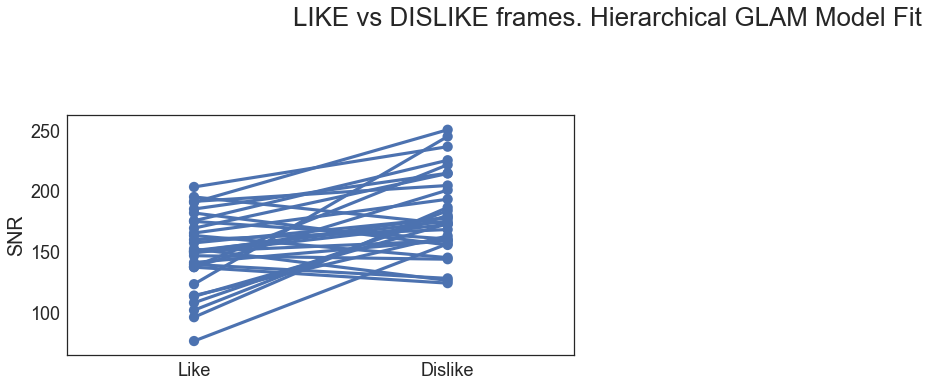

In [40]:
plt.figure(figsize=(20,15))
sns.set(style='white', font_scale=1.8)
plt.suptitle('LIKE vs DISLIKE frames. Hierarchical GLAM Model Fit')

#my_pal = {"r" ,"b"}

#ax1 = sns.pointplot(x="cond", y="v", palette = my_pal,  data=params_participants, hue = 'cond');



plt.subplot(321)
# FOR SNR
for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="SNR",  data=param_indiv);
    ax1.set(ylabel='SNR', xlabel='')



# FOR gamma
plt.subplot(322)
for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="gamma",  data=param_indiv);
    ax1.set(ylabel='gamma', xlabel='')

## FOR tau
plt.subplot(323)
for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="tau",  data=param_indiv);
    ax1.set(ylabel='tau', xlabel='', )

## FOR v
plt.subplot(324)

for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="v",  data=param_indiv);
    ax1.set(ylabel='v', xlabel='', )            
            

# FOR s
plt.subplot(325)
for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="s",  data=param_indiv);
    ax1.set(ylabel='s', xlabel='')


## **The significant differences are mantained independently of the repetition of the fit**